<>:16: SyntaxWarning: invalid escape sequence '\H'
<>:16: SyntaxWarning: invalid escape sequence '\H'
C:\Users\surde\AppData\Local\Temp\ipykernel_16948\3868614022.py:16: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv('E:\House\data.csv')


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

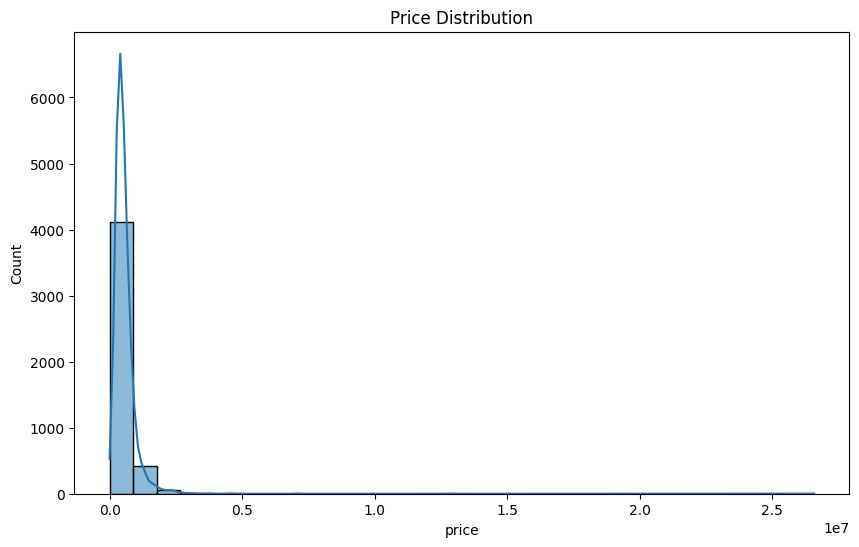

In [1]:
## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pickle

## 2. Load Dataset
# Load dataset
data = pd.read_csv('E:\House\data.csv')
print(data.head())

## 3. Data Preprocessing
# Handle missing values
data = data.dropna()

# Convert categorical variables to numeric
data = pd.get_dummies(data, drop_first=True)

# Features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Exploratory Data Analysis (EDA)
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 5. Model Selection and Training
# Initialize models
knn = KNeighborsRegressor(n_neighbors=5)
lr = LinearRegression()
svm = SVR(kernel='rbf')

# Train models
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)

## 6. Model Evaluation
# Evaluate KNN
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Evaluate SVM
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_r2 = r2_score(y_test, y_pred_svm)

# Print evaluation metrics
print(f"KNN - MSE: {knn_mse}, R2: {knn_r2}")
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")
print(f"SVM - MSE: {svm_mse}, R2: {svm_r2}")

## 7. Conclusion
# Identify the best model based on R2 score and MSE

## 8. Save the Model
# Save the best model (for demonstration, saving Linear Regression)
with open('best_model.pkl', 'wb') as f:
    pickle.dump(lr, f)
